In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

In [59]:
def show_graphics(df: pd.DataFrame, col: str, fecha: str):
    period = 24 * 365
    decomposition_air = seasonal_decompose(df[col], model='additive', period=period)
    plt.figure(figsize=(18, 16))

    plt.subplot(4, 1, 1)
    plt.plot(df[fecha], df[col])
    plt.title('Original TS')

    plt.subplot(4, 1, 2)
    plt.plot(df[fecha], decomposition_air.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(df[fecha], decomposition_air.seasonal, label='Seasonality')
    plt.legend(loc='upper left')
    plt.title('Seasonal Component')

    plt.subplot(4, 1, 4)
    plt.plot(df[fecha], decomposition_air.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.title('Residual Component')

    plt.tight_layout()
    plt.show()

In [60]:
df = pd.read_csv('../../data/homogenized/madrid_data/homogenized_data.csv', parse_dates=['Fecha'])
df.sort_values(by=['Fecha','Hora'], ascending=True, inplace=True)
df = df.dropna()
df

,Fecha,Hora,ESTACION_x,HUMEDAD RELATIVA,TEMPERATURA
0,2019-01-01,0,102,50.0,3.1
1,2019-01-01,1,102,49.0,2.9
2,2019-01-01,2,102,46.0,3.1
3,2019-01-01,3,102,51.0,1.9
4,2019-01-01,4,102,56.0,0.7
...,...,...,...,...,...
53996,2025-02-27,20,102,55.0,8.2
53997,2025-02-27,21,102,58.0,7.6
53998,2025-02-27,22,102,63.0,6.8
53999,2025-02-27,23,102,66.0,6.2


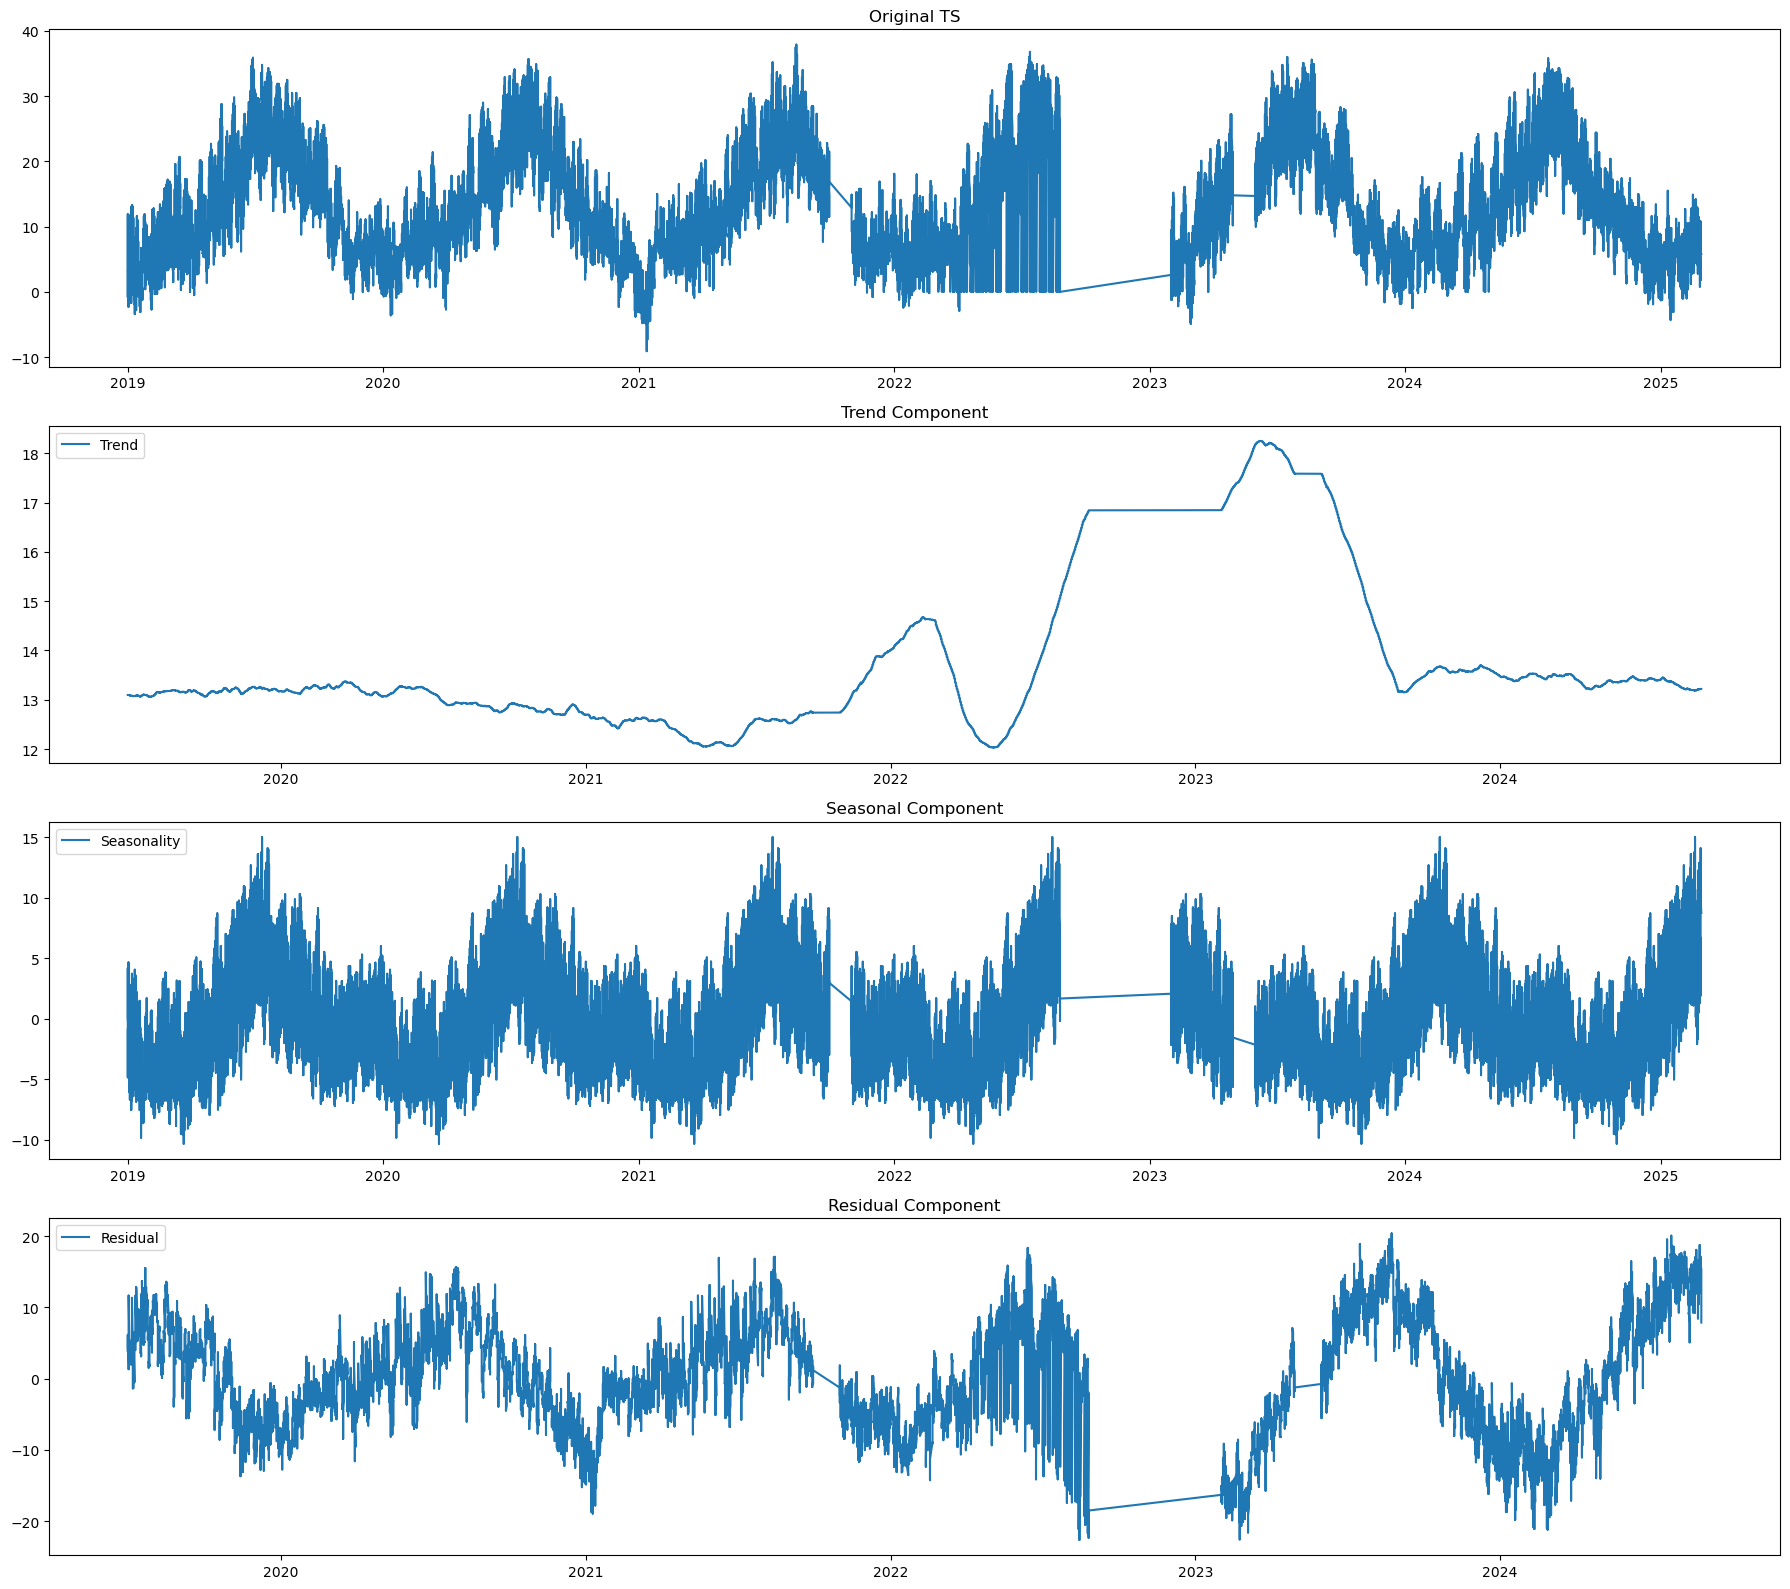

In [61]:
show_graphics(df=df, col='TEMPERATURA', fecha='Fecha')

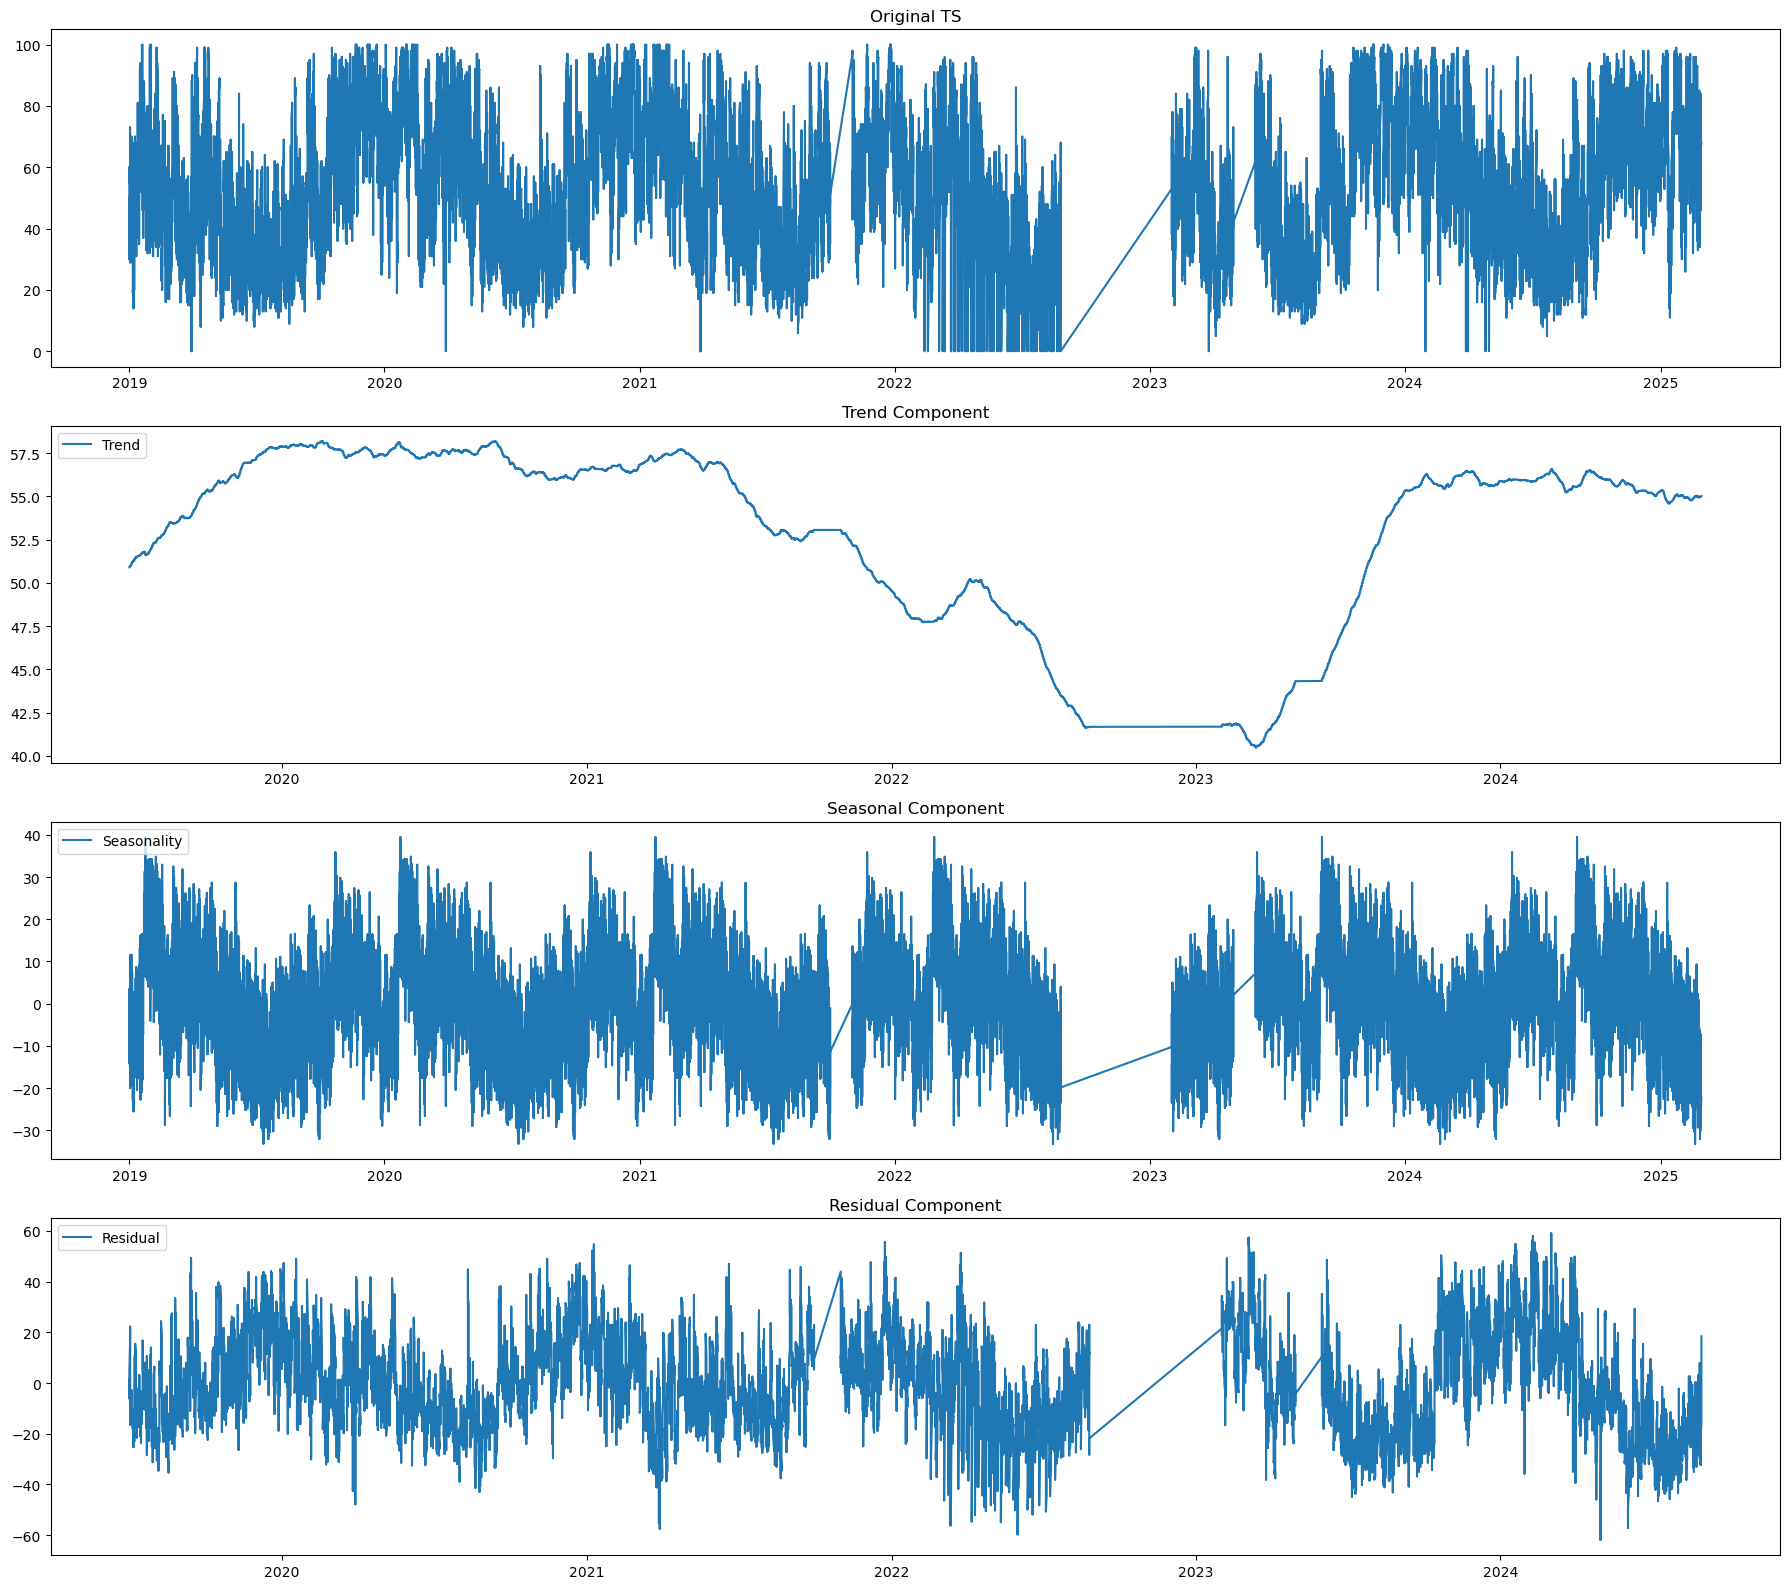

In [62]:
show_graphics(df=df, col='HUMEDAD RELATIVA', fecha='Fecha')

# TRANSFORMADOS

In [63]:
df = pd.read_csv('../../data/transformed/madrid_data/transformed_data.csv', parse_dates=['fecha'])
df.sort_values(by=['fecha','hora'], ascending=True, inplace=True)
df

,fecha,hora,indicativo,humedad_media,temperatura_media,anho,mes,dia
0,2019-01-01,0,102,50.0,3.1,2019,1,1
1,2019-01-01,1,102,49.0,2.9,2019,1,1
2,2019-01-01,2,102,46.0,3.1,2019,1,1
3,2019-01-01,3,102,51.0,1.9,2019,1,1
4,2019-01-01,4,102,56.0,0.7,2019,1,1
...,...,...,...,...,...,...,...,...
53996,2025-02-27,20,102,55.0,8.2,2025,2,27
53997,2025-02-27,21,102,58.0,7.6,2025,2,27
53998,2025-02-27,22,102,63.0,6.8,2025,2,27
53999,2025-02-27,23,102,66.0,6.2,2025,2,27


## TEMPERATURA MEDIA

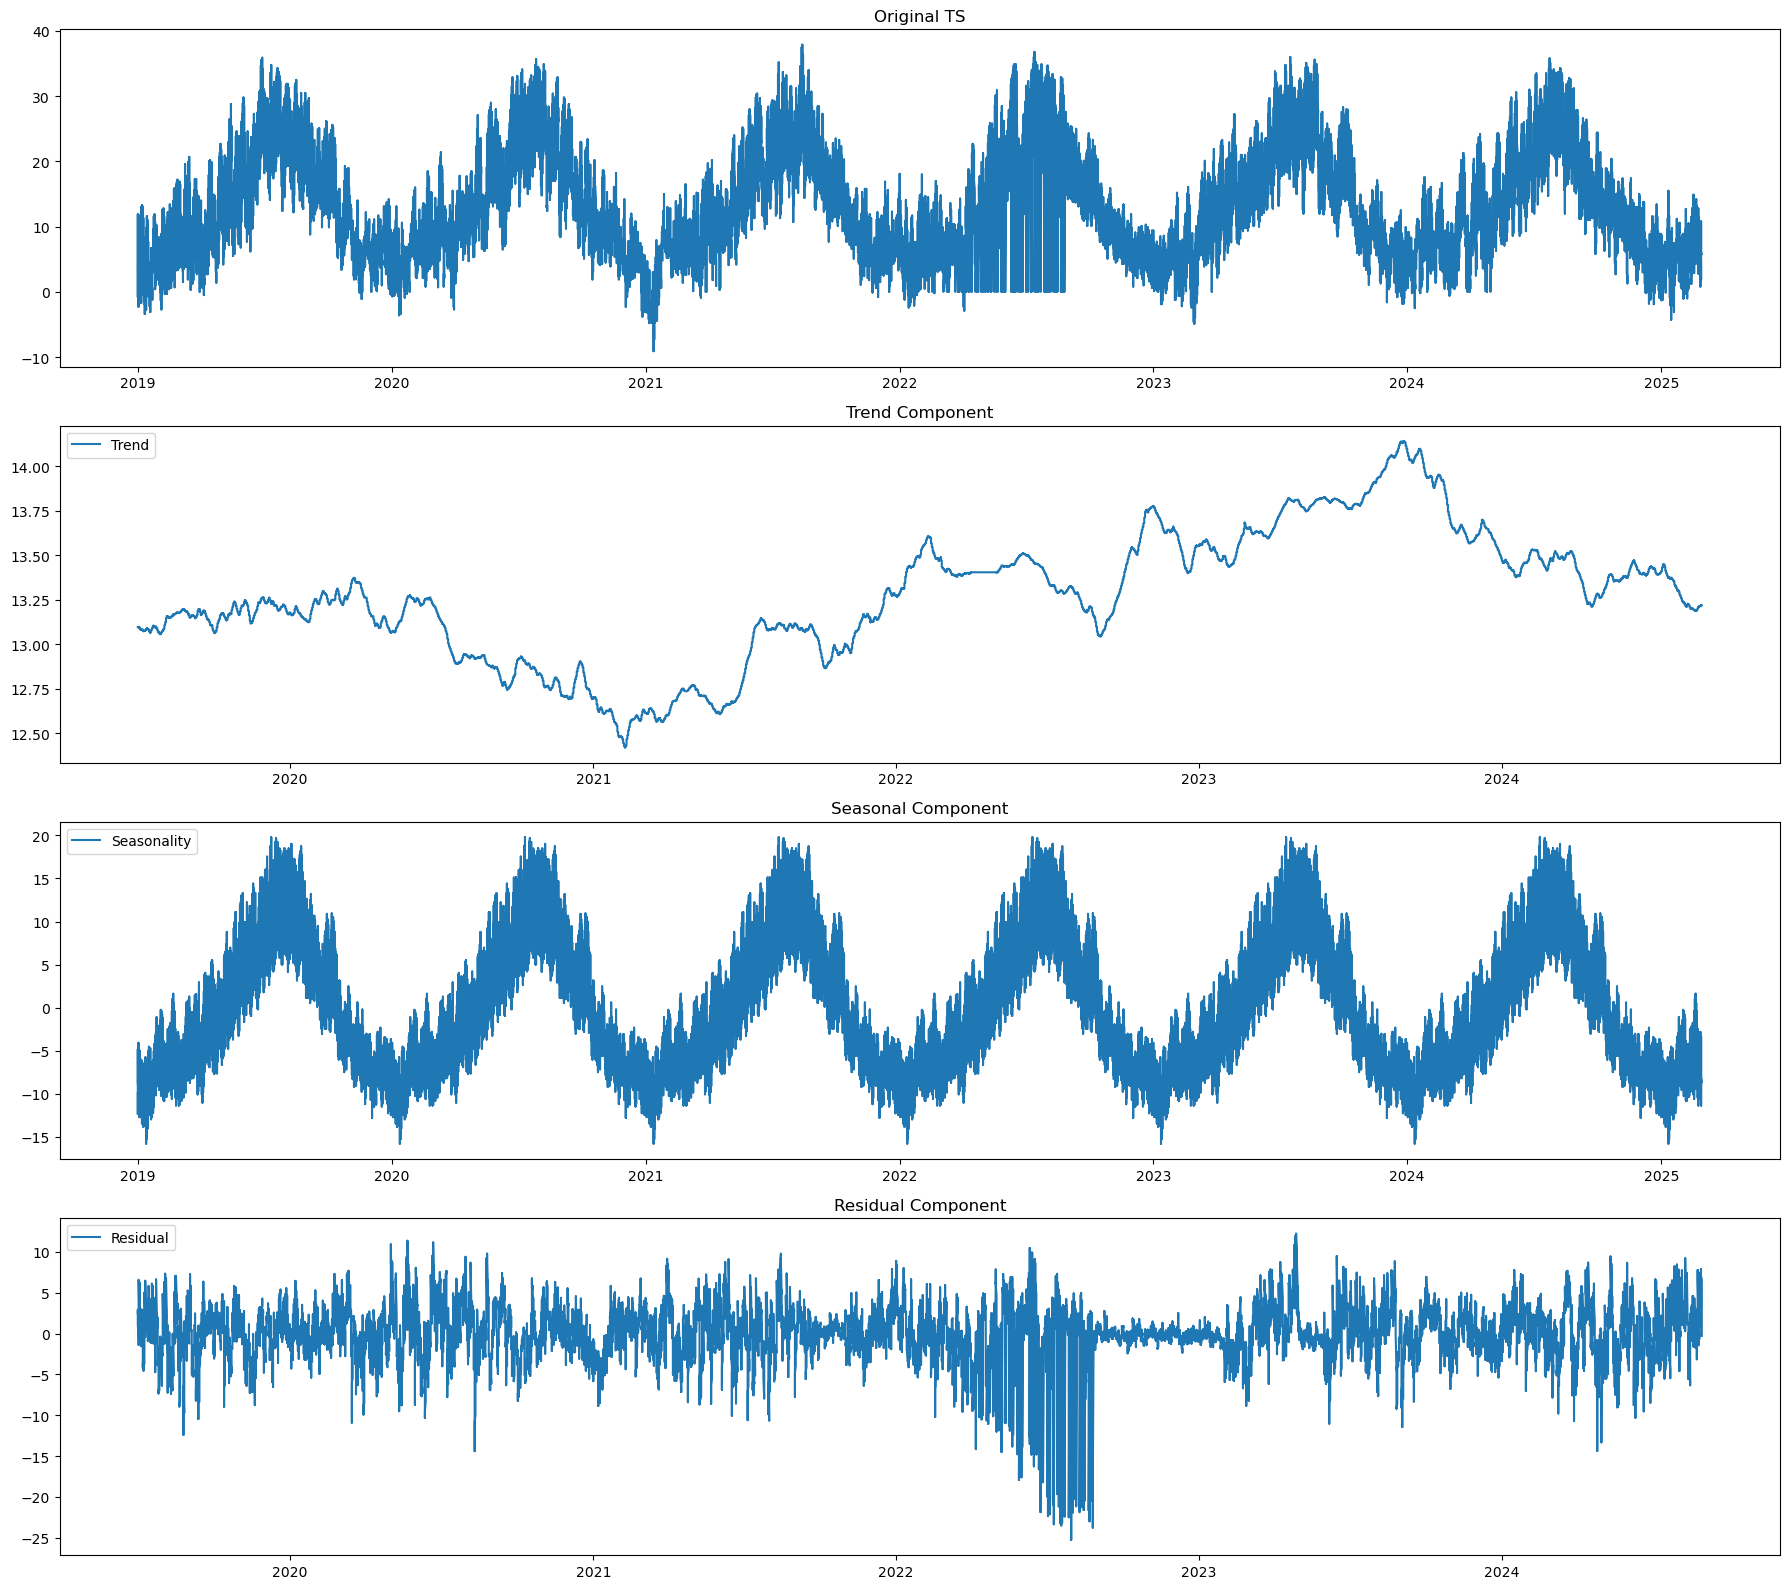

In [64]:
show_graphics(df=df, col='temperatura_media', fecha='fecha')

### 2. Análisis por Hora del Día, Mes

<Axes: xlabel='hora', ylabel='temperatura_media'>

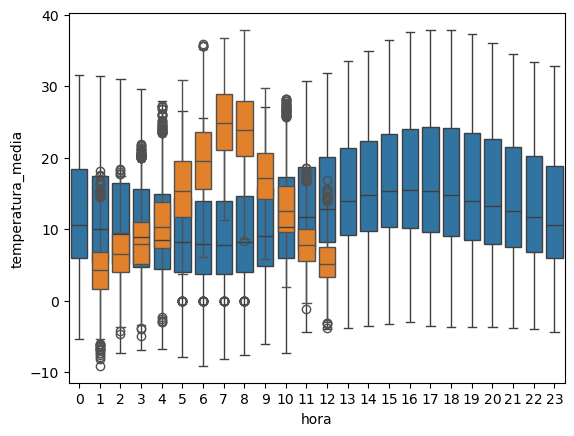

In [65]:
# Boxplot por hora
sns.boxplot(x='hora', y='temperatura_media', data=df)

# Por mes
sns.boxplot(x='mes', y='temperatura_media', data=df)

### 5. Estudio de Máximos/Mínimos por Periodo

<Axes: xlabel='dia'>

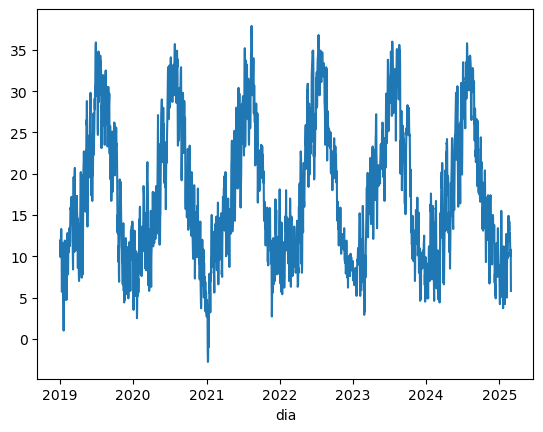

In [66]:
df['dia'] = df['fecha'].dt.date
daily_max_temp = df.groupby('dia')['temperatura_media'].max()
daily_max_temp.plot()

## HUMEDAD_MEDIA

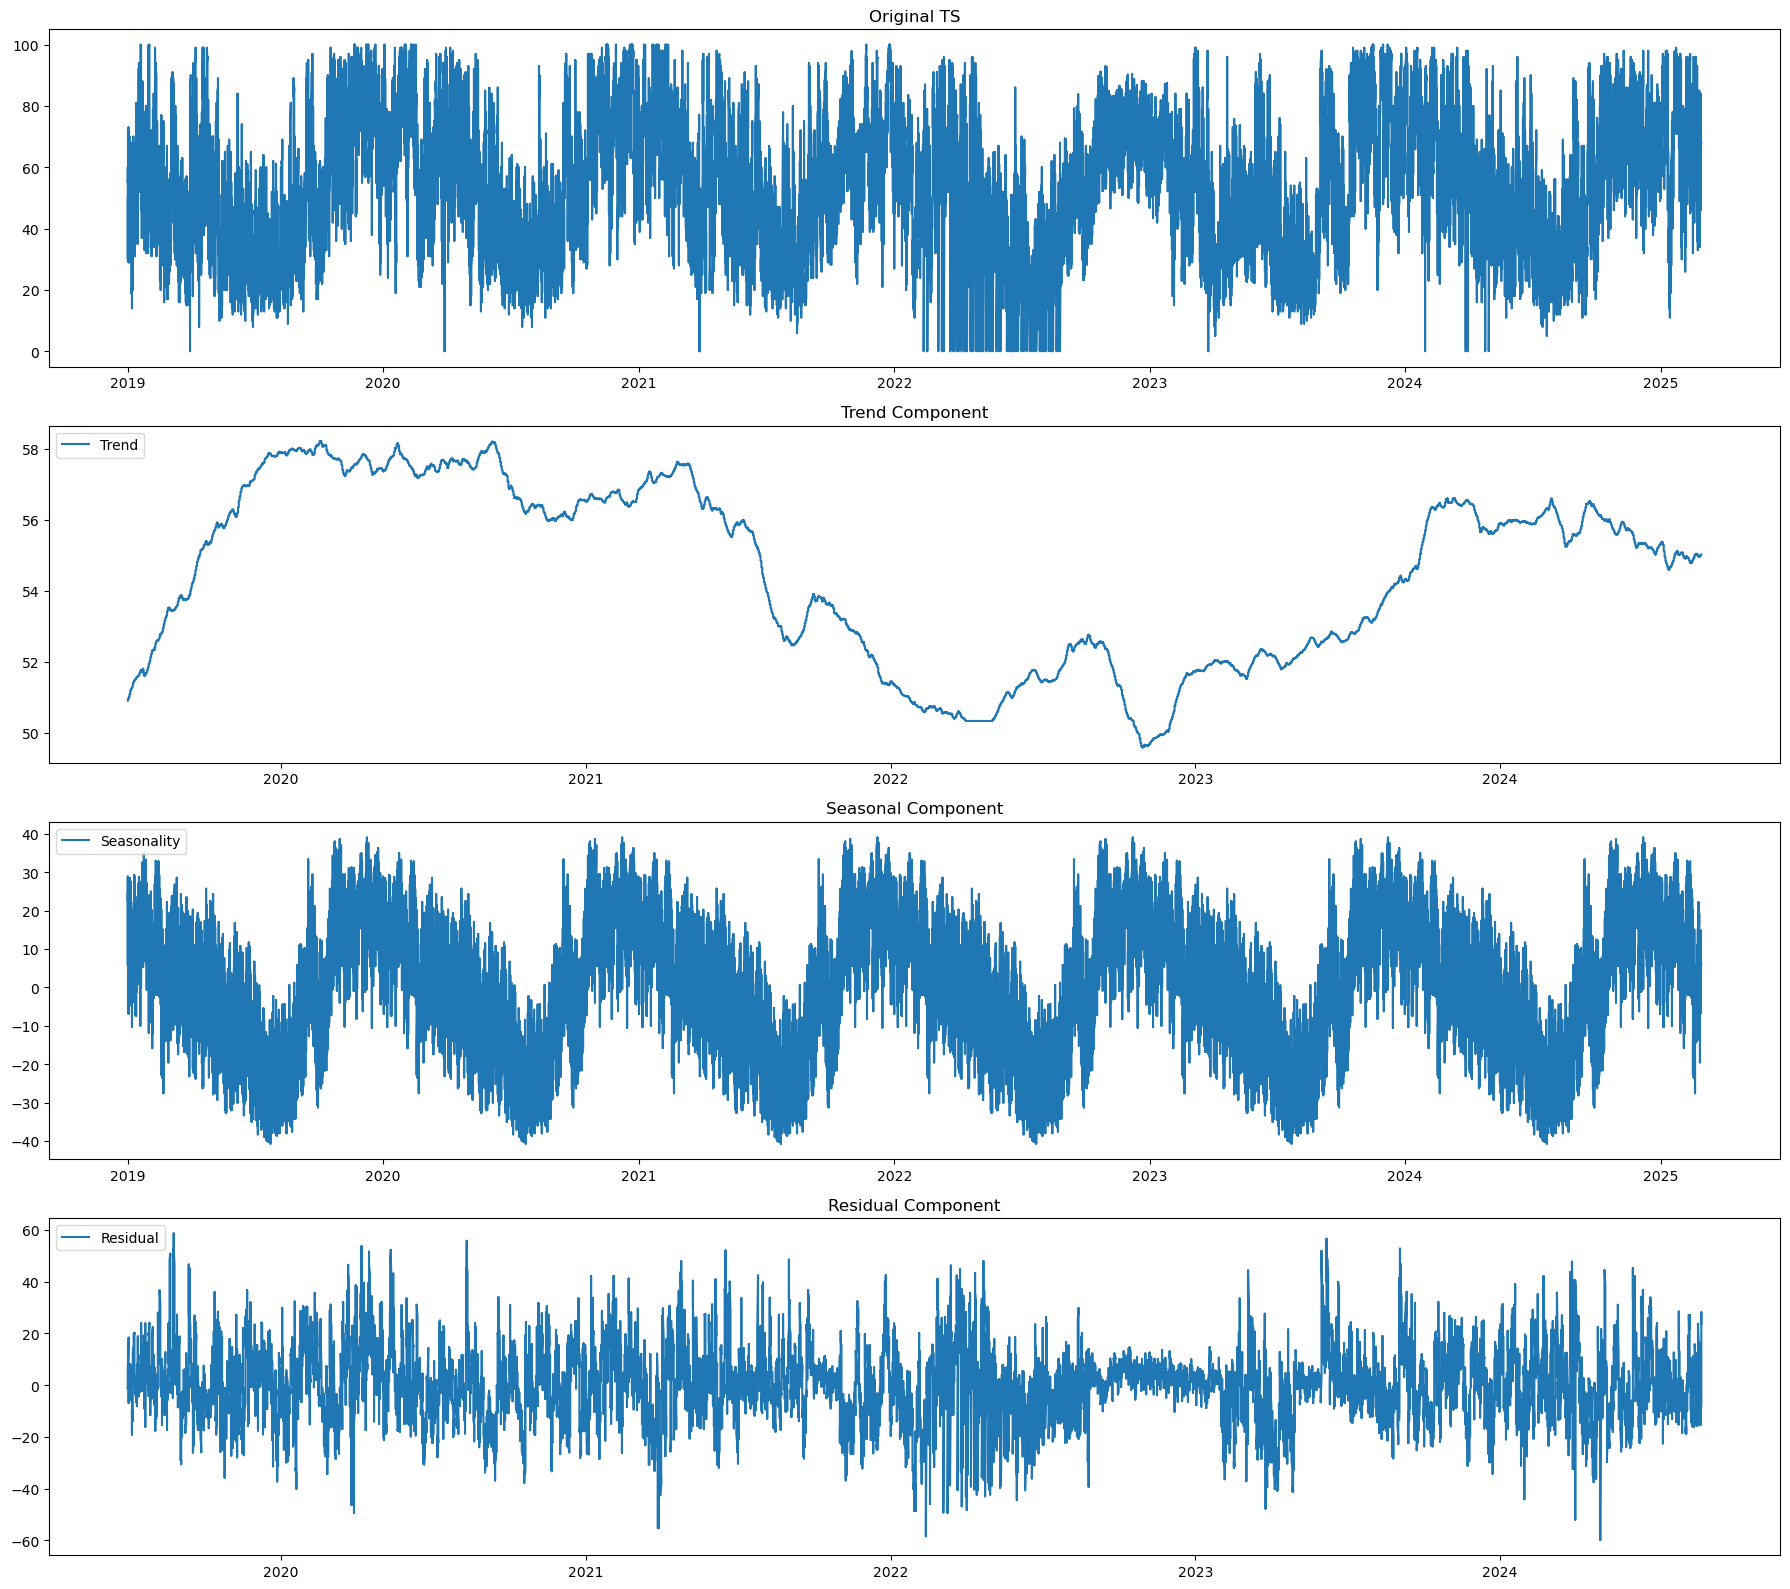

In [67]:
show_graphics(df=df, col='humedad_media', fecha='fecha')

# Determinación de los parámetros (p, d, q)

* p (autoregresivo): Número de rezagos (lags) que se utilizarán para la predicción.
* d (integrado): Número de diferenciaciones necesarias para hacer la serie estacionaria.
* q (media móvil): Número de rezagos de los errores en el modelo.

In [68]:
#df = df[df['anho'] >= 2023]

In [73]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [70]:
# 2. Verifica la estacionariedad de la serie temporal con el test de Dickey-Fuller
result = adfuller(df['temperatura_media'].dropna())  # O 'humedad_media'
print(f'Estadístico ADF: {result[0]}')
print(f'Valor p: {result[1]}')

Estadístico ADF: -6.485301478584642
Valor p: 1.2652770972082192e-08


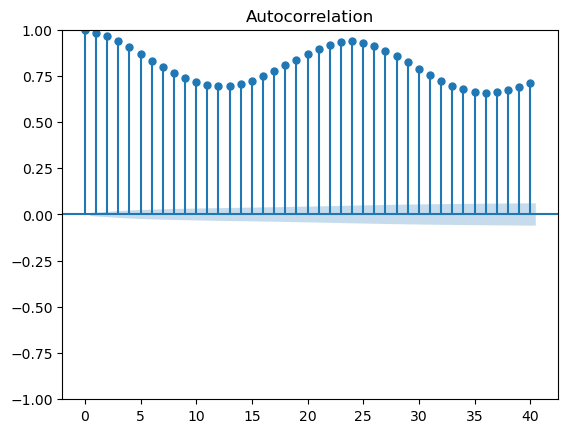

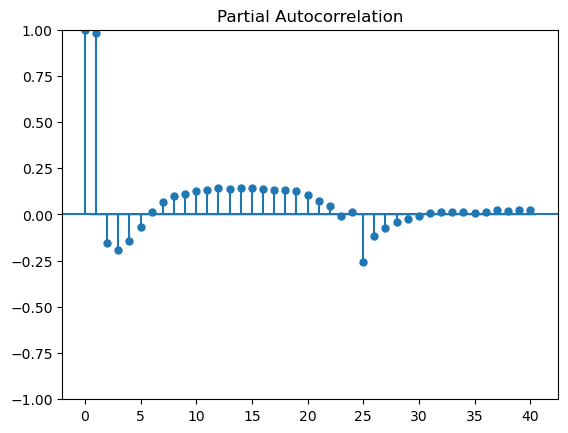

In [72]:
# Gráficos ACF y PACF
plot_acf(df['temperatura_media'], lags=40)
plot_pacf(df['temperatura_media'], lags=40)
plt.show()

# EJEMPLOS MODELOS

In [75]:
# Ajustar el modelo ARIMA(2, 0, 1)
model = ARIMA(df['temperatura_media'], order=(2, 0, 1))
model_fit = model.fit()

# Mostrar los resultados
print(model_fit.summary())

# Realizar pronósticos
forecast = model_fit.forecast(steps=48)
print("Pronósticos:", forecast)

                               SARIMAX Results                                
Dep. Variable:      temperatura_media   No. Observations:                54001
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -95764.894
Date:                Sun, 09 Mar 2025   AIC                         191539.787
Time:                        00:12:30   BIC                         191584.271
Sample:                             0   HQIC                        191553.672
                              - 54001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0323      0.364     35.845      0.000      12.320      13.745
ar.L1          1.7303      0.004    387.587      0.000       1.722       1.739
ar.L2         -0.7409      0.004   -172.428      0.0

In [76]:
# Ajustar el modelo ARIMA(2, 0, 1)
model = ARIMA(df['humedad_media'], order=(2, 0, 1))
model_fit = model.fit()

# Mostrar los resultados
print(model_fit.summary())

# Realizar pronósticos
forecast = model_fit.forecast(steps=48)
print("Pronósticos:", forecast)

                               SARIMAX Results                                
Dep. Variable:          humedad_media   No. Observations:                54001
Model:                 ARIMA(2, 0, 1)   Log Likelihood             -157713.768
Date:                Sun, 09 Mar 2025   AIC                         315437.536
Time:                        00:18:36   BIC                         315482.020
Sample:                             0   HQIC                        315451.421
                              - 54001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3323      0.574     94.659      0.000      53.207      55.457
ar.L1          1.7019      0.005    342.055      0.000       1.692       1.712
ar.L2         -0.7211      0.005   -149.303      0.0